In [14]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


data = pd.read_pickle('/home/jakob/Project_MayaSim/output_data/X7_eco_income/results/trajectory')
lvs = data.index.levels

cmap = mpl.cm.get_cmap('Spectral')
cls = cmap(np.linspace(0, 1, len(lvs[0])*len(lvs[1])))

def plotlines(data, level, key, unstack):
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    key[0] = False
    data['<mean_trajectories>'].xs(level=level, key=key).unstack(unstack).plot(ax=ax1, legend=False, color=cls)
    ax2 = fig.add_subplot(122)
    key[0] = True
    ln = data['<mean_trajectories>'].xs(level=level, key=key).unstack(unstack).plot(ax=ax2, color=cls)
    lg = ln.get_legend()
    bb = lg.get_bbox_to_anchor().inverse_transformed(ax2.transAxes)
    xOffset = .5
    bb.x0 += xOffset
    bb.x1 += xOffset
    lg.set_bbox_to_anchor(bb, transform = ax2.transAxes)

Populating the interactive namespace from numpy and matplotlib


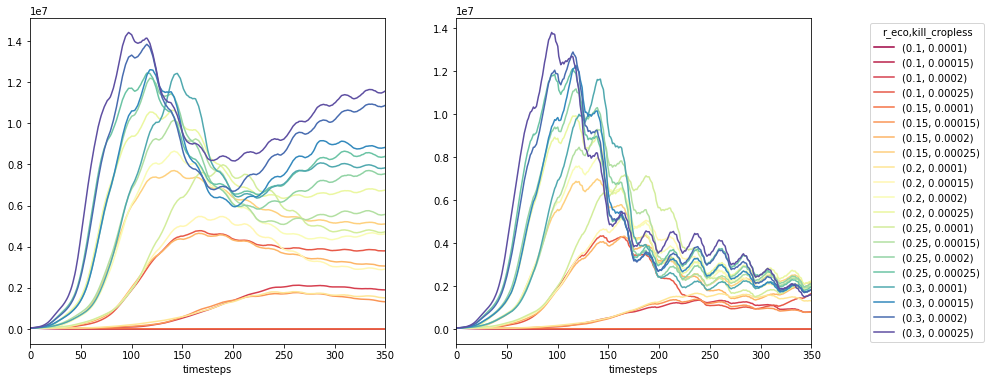

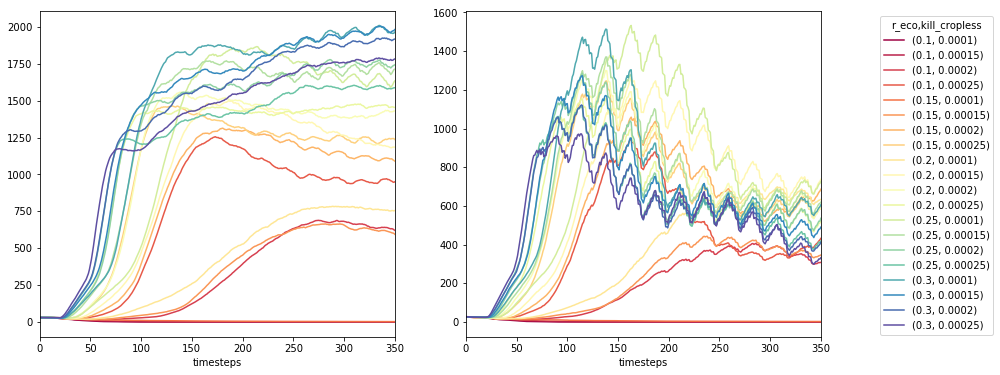

In [13]:
key=[False, 'total_population']
level=['r_bca', 'observables']
unstack = ['r_eco', 'kill_cropless']

plotlines(data, level, key, unstack)

key=[False, 'total_settlements']
level=['r_bca', 'observables']
unstack = ['r_eco', 'kill_cropless']

plotlines(data, level, key, unstack)

Killing of cities without crops obviously makes a huge difference. Leaving cities without crops alive leads to significantly less pronounced overshoot and collapse behavior in population and no collapse in number of settlements. Although I wonder, if settlements do propperly die from low population.

The different sources of income are shown below:

Agriculture Income does not differ between the conditions. Ecosysten and trade income do.

It is visible, that for none of the tested parameters the climate variability signature does not show in the trade income, if cities without crops remain alive.

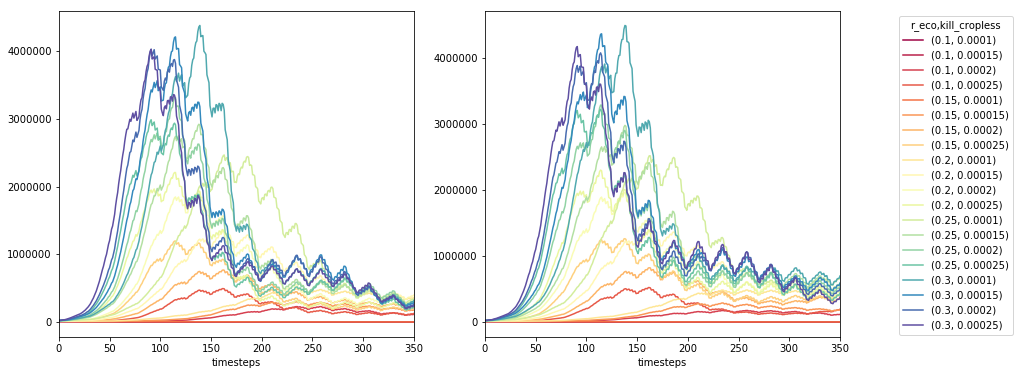

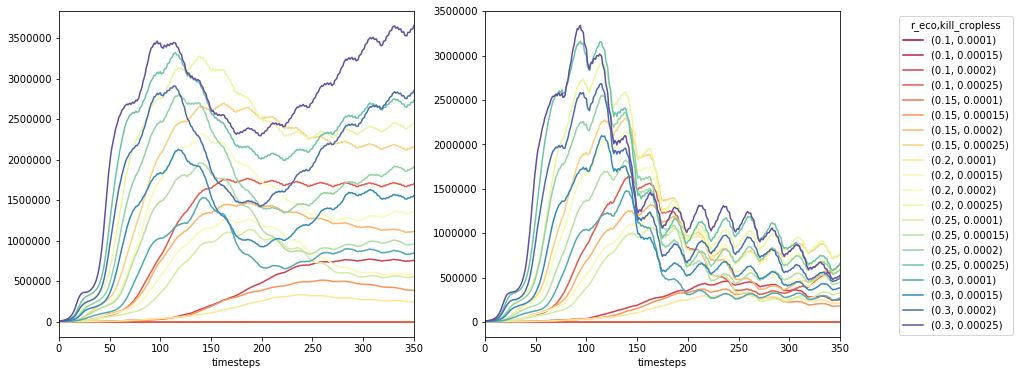

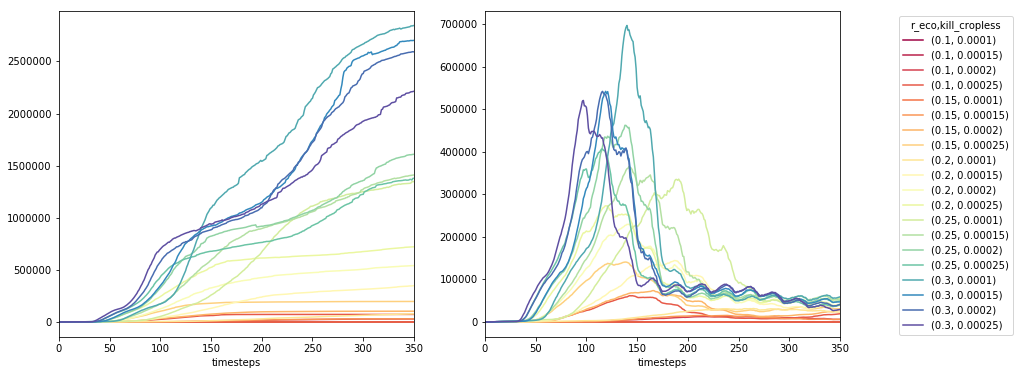

In [12]:
key=[False, 'total_income_agriculture']
level=['r_bca', 'observables']
unstack = ['r_eco', 'kill_cropless']

plotlines(data, level, key, unstack)

key=[False, 'total_income_ecosystem']
level=['r_bca', 'observables']
unstack = ['r_eco', 'kill_cropless']

plotlines(data, level, key, unstack)

key=[False, 'total_income_trade']
level=['r_bca', 'observables']
unstack = ['r_eco', 'kill_cropless']

plotlines(data, level, key, unstack)

All of this leaves me wondering, if trade links are removed propperly, if cities population shrinks.
It looks as if trade links only vanish if settlements die. Check this!